In [1]:
################ Data Analysis & Calculation ##############3
import numpy as np 
import pandas as pd 

############ Data Visualization ##############
import matplotlib.pyplot as plt
%matplotlib inline

############### NLP & Search pattern ##################
import re  
import nltk 

############### Ignore Warning #############3
import warnings
warnings.filterwarnings('ignore')

In [3]:
oxy=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\NLP\oxygen_crises.csv")
oxy.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,galabhupesh,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,524,@ANI When Court asked for Oxygen Audits and wh...,0,False
1,its_sreedhar,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,217,AP gov sanctioned 310cr for 49 oxygen plants f...,0,False
2,khansahilrehab,"Patna, India",Twitter for iPhone,NaN,2021-05-09 15:40:48,False,337,@thevirdas Only Oxygen and steroids seem to wo...,0,False
3,ArunGarimella,"Vijayawada, India",Twitter for Android,NaN,2021-05-09 15:40:46,False,93,"Sir, Need Oxygen bed urgently in Vijayawada , ...",0,False
4,iprachi_singh,"Rajasthan, India",Twitter for Android,NaN,2021-05-09 15:40:45,False,926,@dulcetchani @TajinderBagga @yuvahallabol I th...,0,False


In [5]:
oxy.shape

(1000, 10)

In [9]:
data=pd.DataFrame(oxy.text)
data.head()

,text
0,@ANI When Court asked for Oxygen Audits and wh...
1,AP gov sanctioned 310cr for 49 oxygen plants f...
2,@thevirdas Only Oxygen and steroids seem to wo...
3,"Sir, Need Oxygen bed urgently in Vijayawada , ..."
4,@dulcetchani @TajinderBagga @yuvahallabol I th...


In [11]:
data.iloc[4,0]

'@dulcetchani @TajinderBagga @yuvahallabol I think normal oxygen bed'

In [13]:
data.iloc[1,0]

'AP gov sanctioned 310cr for 49 oxygen plants for all districts and said that plants will become operational within… https://t.co/6RSd7NTEsb'

In [15]:
data.text=data.text.str.lower()

In [17]:
data.iloc[4,0]

'@dulcetchani @tajinderbagga @yuvahallabol i think normal oxygen bed'

In [19]:
data['text'] = data['text'].replace(r'http\S+|www\S+', '', regex=True)
data.iloc[1,0]

'ap gov sanctioned 310cr for 49 oxygen plants for all districts and said that plants will become operational within… '

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def remove_punctuation(abc):
    text_nopunt="".join([c
                        for c in abc
                        if c not in string.punctuation])
    return text_nopunt

In [39]:
data.text = data.text.apply(lambda x : remove_punctuation(x))

In [41]:
data.iloc[3,0]

'sir need oxygen bed urgently in vijayawada  andhra pradesh\n\npatient name satyavathi\nage75\ncontact 7995807468… '

In [43]:
data['text'] = data['text'].replace(r'\d+', '', regex=True)

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
stop = stopwords.words('English')

print("No.of StopWords :",len(stop))
stop

No.of StopWords : 179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
data.text = data.text.apply(lambda x: ' '.join([c      
                                                      for c in x.split()    
                                                      if c not in (stop)]))

In [51]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [53]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
lemmatizer = WordNetLemmatizer() 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  

In [57]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") 
            for w in w_tokenizer.tokenize(abc)]  

In [59]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))  
data.iloc[991,0]

'bighitmusic btsbighit oppa need oxygen 💜💜💜❤️❤️❤️💜💜💜💜🙈🙈🙈🙈💜💜💜❤️❤️❤️💜💜'

In [61]:
data.text = data.text.str.rstrip()

In [63]:
data.head(10)

,text
0,ani court ask oxygen audit near ones get catch...
1,ap gov sanction cr oxygen plant district say p...
2,thevirdas oxygen steroids seem work rest equiv...
3,sir need oxygen bed urgently vijayawada andhra...
4,dulcetchani tajinderbagga yuvahallabol think n...
5,sonusood soodfoundation sonu sood bhai need ox...
6,mehuldevkala rizvisalim saliltripathi svaradar...
7,freenatashanarwal freepoliticalprisoners naren...
8,sootradhar vasudevanl know company would sell ...
9,jesussunbaes yah concept they’re clown us 😭😭😭😭...


In [65]:
data=data.drop_duplicates()
data.shape

(975, 1)

In [69]:
data.head(10)

,text
0,ani court ask oxygen audit near ones get catch...
1,ap gov sanction cr oxygen plant district say p...
2,thevirdas oxygen steroids seem work rest equiv...
3,sir need oxygen bed urgently vijayawada andhra...
4,dulcetchani tajinderbagga yuvahallabol think n...
5,sonusood soodfoundation sonu sood bhai need ox...
6,mehuldevkala rizvisalim saliltripathi svaradar...
7,freenatashanarwal freepoliticalprisoners naren...
8,sootradhar vasudevanl know company would sell ...
9,jesussunbaes yah concept they’re clown us 😭😭😭😭...


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') 
data_cv = cv.fit_transform(data.text)  
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) 
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,965,966,967,968,969,970,971,972,973,974
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaittttttt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacccckkkkkk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝐕𝐞𝐫𝐢𝐟𝐢𝐞𝐝,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
𝘿𝙂,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
𝘿𝙍𝘿𝙊,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
𝘿𝙧𝙪𝙜,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,966,967,968,969,970,971,972,973,974,freq
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aaaaaaaaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaaaaaaittttttt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aacccckkkkkk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,966,967,968,969,970,971,972,973,974,freq
0,aa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,aaaa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,aaaaaaaaaaa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,aaaaaaaittttttt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,aacccckkkkkk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
2323,oxygen,741
2211,need,146
343,bed,129
1425,hospital,82
858,delhi,70
...,...,...
1429,hospitalise,1
1431,hospitalscam,1
1433,hota,1
1438,htqwertyht,1


In [83]:
w = tdm1[tdm1['freq'] >20]
w.head()

,Word,freq
2323,oxygen,741
2211,need,146
343,bed,129
1425,hospital,82
858,delhi,70


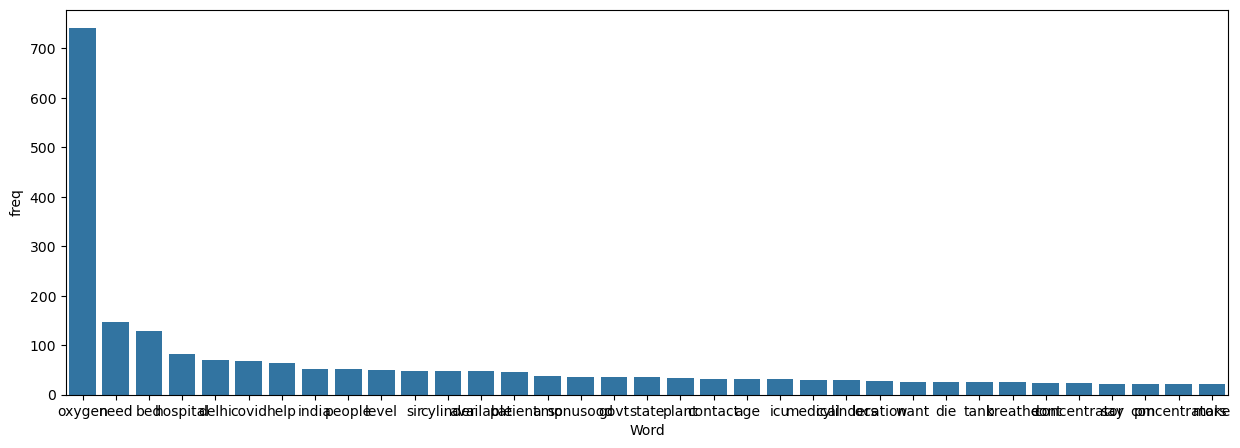

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
fg = sns.barplot(x='Word', y='freq',data=w)

In [87]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 74697 words in the combination of all review.


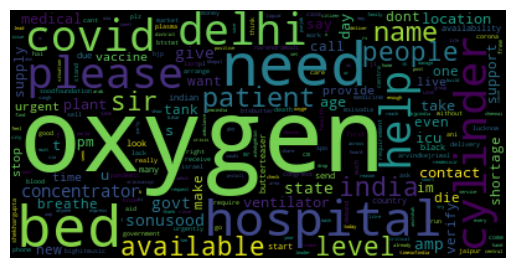

In [91]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

abc = WordCloud(stopwords=stopwords,
                      background_color="black",
                      collocations=False,
                      mode="RGBA",  # r = red , g = green , b = blue
                      max_words=74697).generate(text)

plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

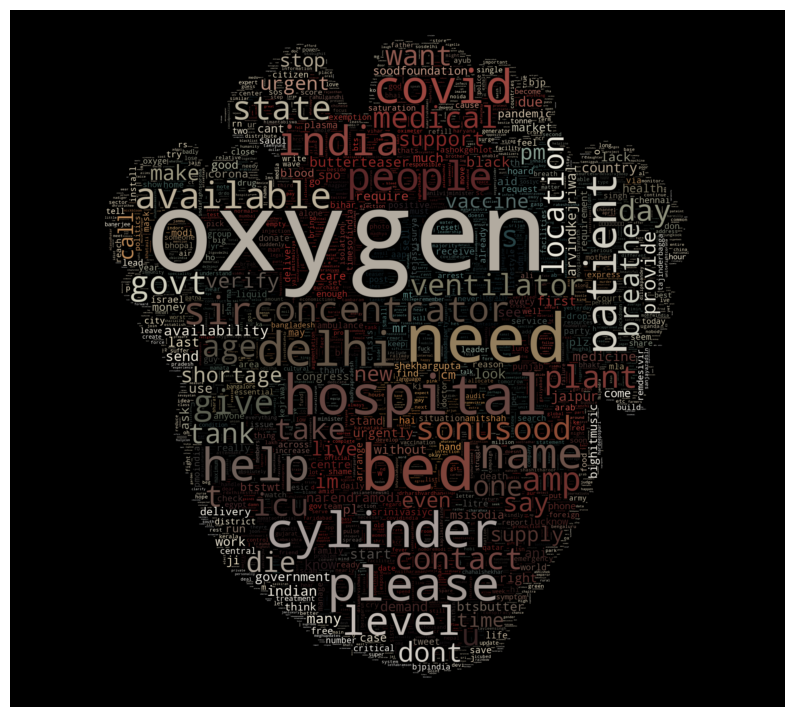

In [101]:
from PIL import Image

mask = np.array(Image.open(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\NLP\heart.webp"))
abc = WordCloud(stopwords=stopwords,
                           background_color='black',
                           mode="RGBA", 
                           max_words=15000, 
                           mask=mask,  
                           collocations=False).generate(text)


image_colors = ImageColorGenerator(mask) 
plt.figure(figsize=[10,15])  
plt.imshow(abc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()